In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

In [4]:
df = pd.read_csv("../data/heartbeat/mitbih_train.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("Data shape: ", df.shape)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

Data shape:  (87554, 188)


Text(0, 0.5, 'Count')

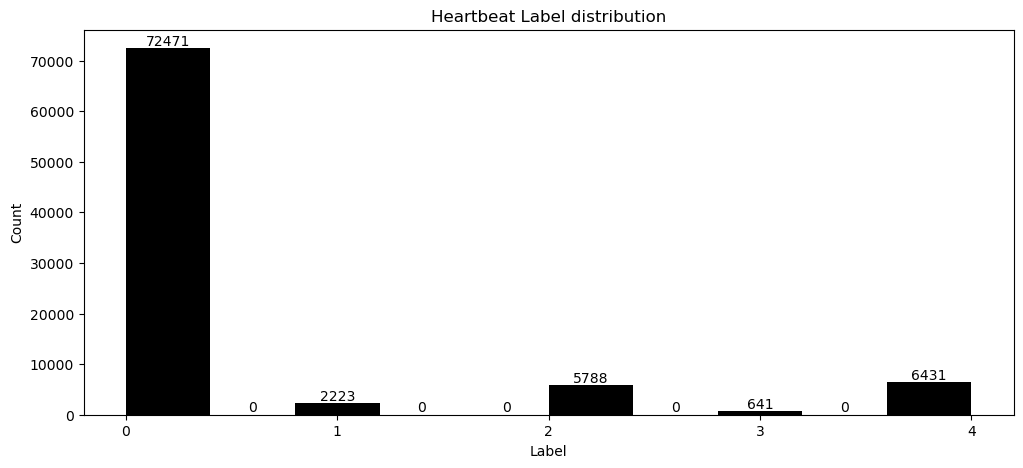

In [18]:
fig = plt.figure(figsize=(12,5))
counts, bins, patches = plt.hist(y, color="black")

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, str(int(count)), 
            ha='center', va='bottom', fontsize=10)

plt.xticks([0,1,2,3,4])
plt.title("Heartbeat Label distribution")
plt.xlabel("Label")
plt.ylabel("Count")

Text(0.5, 1.0, 'A sample of heartbeat of class 0')

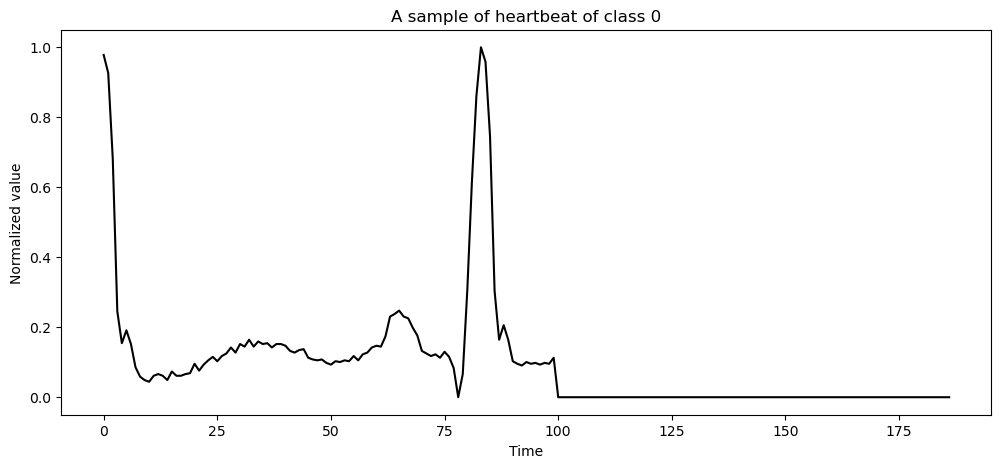

In [17]:
plt.figure(figsize=(12,5))
sample = X.iloc[0, :]
plt.plot(sample, 'k')
plt.xlabel("Time")
plt.ylabel("Normalized value")
plt.title("A sample of heartbeat of class 0")

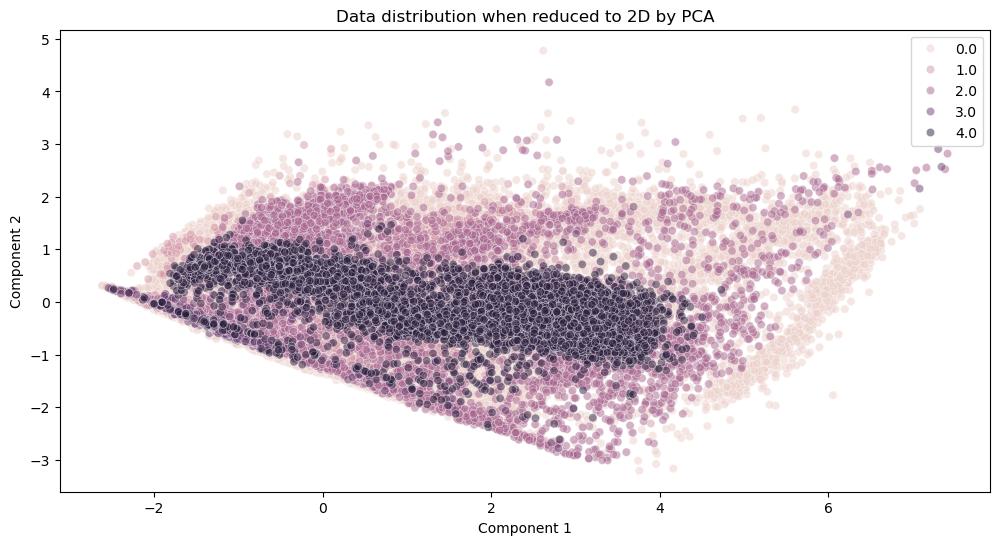

In [10]:
fig = plt.figure(figsize=(12,6))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="viridis", alpha = 0.7, label=y)
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue=y, alpha=0.5)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Data distribution when reduced to 2D by PCA")
plt.legend()